In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Price_euros_train.csv', encoding='latin1')

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
1,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
2,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
3,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
4,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97


In [ ]:
df.dtypes

,0
laptop_ID,int64
Company,object
Product,object
TypeName,object
Inches,float64
ScreenResolution,object
Cpu,object
Ram,object
Memory,object
Gpu,object


In [ ]:
df.shape

(1108, 13)

In [ ]:
df.isnull().sum()

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,11
Cpu,0
Ram,0
Memory,0
Gpu,0


In [ ]:
df_nan = df.loc[:, df.isnull().any()]
df_nan

,ScreenResolution,OpSys,Weight
0,1440x900,macOS,1.34kg
1,IPS Panel Retina Display 2880x1800,macOS,1.83kg
2,IPS Panel Retina Display 2560x1600,macOS,1.37kg
3,1366x768,Windows 10,2.1kg
4,IPS Panel Retina Display 2880x1800,Mac OS X,2.04kg
...,...,...,...
1103,1366x768,Windows 10,2.2kg
1104,IPS Panel Full HD / Touchscreen 1920x1080,Windows 10,1.8kg
1105,1366x768,Windows 10,1.5kg
1106,1366x768,Windows 10,2.19kg


In [ ]:
df_nan.isnull().sum() / len(df_nan) * 100

,0
ScreenResolution,0.992780
OpSys,4.783394
Weight,1.985560


In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,864
No OS,55
Linux,53
Windows 7,35
Chrome OS,25
macOS,8
Mac OS X,7
Windows 10 S,6
Android,2


In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')

imp_scr = imputer.transform(df[['ScreenResolution']])
imp_w = imputer.transform(df[['Weight']])
mp_combined = np.column_stack((imp_scr, imp_w))
imp = pd.DataFrame(mp_combined, columns = ['ScreenResolution', 'Weight'])
df[['ScreenResolution', 'Weight']] = imp

df.isnull().sum()

KeyError: "None of [Index(['ScreenResolution'], dtype='object')] are in the [columns]"

In [ ]:
df['OpSys'] = df['OpSys'].replace({'Windows 10': 1, 'No OS': 2, 'Linux': 3, 'Windows 7' : 4, 'Chrome OS': 5,
                                   'macOS': 6, 'Mac OS X': 7, 'Windows 10 S': 8, 'Android': 9})

<ipython-input-67-b88a92ee1b3c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['OpSys'] = df['OpSys'].replace({'Windows 10': 1, 'No OS': 2, 'Linux': 3, 'Windows 7' : 4, 'Chrome OS': 5,


In [ ]:
df = df.fillna(0)

df.isnull().sum()

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


In [ ]:
#очистка столбца ram
df['Ram'] = df['Ram'].astype(str)
df['Ram'] = df['Ram'].str.extract(r'(\d+)')
df['Ram'] = df['Ram'].astype(int)

# #разделение на ширину и длину
# df[['Width', 'Height']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)', expand = True)
# df['Width'] = df['Width'].astype(int)
# df['Height'] = df['Height'].astype(int)

# #разделение тип и частоту процессора
# df[['CpuFrequency']] = df['Cpu'].str.extract(r'(\d+(?:\.\d+)?)\s*GHz')
# df['CpuFrequency'] = df['CpuFrequency'].astype(float)

df['Weight'] = df['Weight'].str.extract(r'(\d+\.\d+)')
df['Weight'] = df['Weight'].astype(float)

# df['Memory'] = df['Memory'].astype(str)
# df['Memory'] = df['Memory'].str.extract(r'(\d+)')
# df['Memory'] = df['Memory'].astype(int)

cpu_pattern = r'(.+?)\s+(\d+\.?\d*)\s*GHz'
extracted_cpu = df['Cpu'].str.extract(cpu_pattern)
df[['Cpu_Model', 'Cpu_Frequency']] = extracted_cpu
df['Cpu_Frequency'] = df['Cpu_Frequency'].astype(float)

screen_pattern = r'(?:(Full HD|IPS Panel|Touchscreen|4K Ultra HD|Retina Display|HD)?\s*(\d+)\s*x\s*(\d+))'
df[['Screen_Type', 'Width', 'Height']] = df['ScreenResolution'].str.extract(screen_pattern)
df['Width'] = df['Width'].astype(int)
df['Height'] = df['Height'].astype(int)


memory_pattern = r'(\d+\.?\d*\s*(GB|TB))\s*(HDD|SSD|Flash Storage|Hybrid)?'
df[['Memory_Amount', 'Memory_Unit', 'Memory_Type']] = df['Memory'].str.extract(memory_pattern)
df['Memory_Amount'] = df['Memory_Amount'].str.replace('GB', '', regex = False)
df['Memory_Amount'] = df['Memory_Amount'].str.replace('TB', '', regex = False)
df['Memory_Amount'] = df['Memory_Amount'].astype(float)

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Weight,Price_euros,Cpu_Model,Cpu_Frequency,Screen_Type,Width,Height,Memory_Amount,Memory_Unit,Memory_Type
0,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,...,1.34,898.94,Intel Core i5,1.8,NaN,1440,900,128.0,GB,Flash Storage
1,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,...,1.83,2537.45,Intel Core i7,2.7,Retina Display,2880,1800,512.0,GB,SSD
2,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,...,1.37,1803.60,Intel Core i5,3.1,Retina Display,2560,1600,256.0,GB,SSD
3,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,...,2.10,400.00,AMD A9-Series 9420,3.0,NaN,1366,768,500.0,GB,HDD
4,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,...,2.04,2139.97,Intel Core i7,2.2,Retina Display,2880,1800,256.0,GB,Flash Storage


In [ ]:
df = df.drop('Cpu', axis = 1)
df = df.drop('ScreenResolution', axis = 1)
df['Memory_Amount'] = df['Memory_Amount'].replace(1.0, 1024.0)
df = df.drop('Memory_Unit', axis = 1)
df = df.drop('Memory', axis = 1)
df = df.drop('Screen_Type', axis = 1)

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Model,Cpu_Frequency,Width,Height,Memory_Amount,Memory_Type
0,2,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,6.0,1.34,898.94,Intel Core i5,1.8,1440,900,128.0,Flash Storage
1,4,Apple,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,6.0,1.83,2537.45,Intel Core i7,2.7,2880,1800,512.0,SSD
2,5,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,6.0,1.37,1803.60,Intel Core i5,3.1,2560,1600,256.0,SSD
3,6,Acer,Aspire 3,Notebook,15.6,4,AMD Radeon R5,1.0,2.10,400.00,AMD A9-Series 9420,3.0,1366,768,500.0,HDD
4,7,Apple,MacBook Pro,Ultrabook,15.4,16,Intel Iris Pro Graphics,7.0,2.04,2139.97,Intel Core i7,2.2,2880,1800,256.0,Flash Storage


In [ ]:
df['Memory_Type'].value_counts()

,count
Memory_Type,
SSD,712
HDD,323
Flash Storage,65
Hybrid,8


In [ ]:
df['Memory_Type'] = df['Memory_Type'].replace({'SSD': 1, 'HDD': 2, 'Flash Storage': 3, 'Hybrid' : 4})

<ipython-input-73-f7515a307a16>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Memory_Type'] = df['Memory_Type'].replace({'SSD': 1, 'HDD': 2, 'Flash Storage': 3, 'Hybrid' : 4})


In [ ]:
df['Cpu_Model'].unique().tolist()



['Intel Core i5',
 'Intel Core i7',
 'AMD A9-Series 9420',
 'Intel Core i7 8550U',
 'Intel Core i5 7200U',
 'Intel Core i3 6006U',
 'Intel Core M m3',
 'Intel Core i7 7500U',
 'Intel Core i3 7100U',
 'Intel Core i5 8250U',
 'Intel Atom x5-Z8350',
 'Intel Core i5 7300HQ',
 'AMD E-Series E2-9000e',
 'Intel Core i7 8650U',
 'AMD E-Series E2-6110',
 'AMD A6-Series 9220',
 'Intel Celeron Dual Core N3350',
 'Intel Core i3 7130U',
 'Intel Core i7 7700HQ',
 'AMD Ryzen 1700',
 'Intel Pentium Quad Core N4200',
 'Intel Atom x5-Z8550',
 'Intel Celeron Dual Core N3060',
 'AMD FX 9830P',
 'Intel Core i7 7560U',
 'AMD E-Series 6110',
 'Intel Core i5 6200U',
 'Intel Core M 6Y75',
 'Intel Core i5 7500U',
 'Intel Core i7 6920HQ',
 'Intel Core i5 7Y54',
 'Intel Xeon E3-1505M V6',
 'Intel Core i7 6500U',
 'AMD E-Series 9000e',
 'Intel Core i7 7820HK',
 'Intel Core i7 6600U',
 'Intel Celeron Dual Core 3205U',
 'Intel Core i7 7820HQ',
 'Intel Core i7 7600U',
 'AMD A8-Series 7410',
 'Intel Celeron Dual Core 

In [ ]:
df['Cpu_Model'] = df['Cpu_Model'].replace({'Intel Core i5':1,
 'Intel Core i7':2,
 'AMD A9-Series 9420':3,
 'Intel Core i7 8550U':4,
 'Intel Core i5 7200U':5,
 'Intel Core i3 6006U':6,
 'Intel Core M m3':7,
 'Intel Core i7 7500U':8,
 'Intel Core i3 7100U':9,
 'Intel Core i5 8250U':10,
 'Intel Atom x5-Z8350':11,
 'Intel Core i5 7300HQ':12,
 'AMD E-Series E2-9000e':13,
 'Intel Core i7 8650U':14,
 'AMD E-Series E2-6110':15,
 'AMD A6-Series 9220':16,
 'Intel Celeron Dual Core N3350':17,
 'Intel Core i3 7130U':18,
 'Intel Core i7 7700HQ':19,
 'AMD Ryzen 1700':20,
 'Intel Pentium Quad Core N4200':21,
 'Intel Atom x5-Z8550':22,
 'Intel Celeron Dual Core N3060':23,
 'AMD FX 9830P':24,
 'Intel Core i7 7560U':25,
 'AMD E-Series 6110':26,
 'Intel Core i5 6200U':27,
 'Intel Core M 6Y75':28,
 'Intel Core i5 7500U':29,
 'Intel Core i7 6920HQ':30,
 'Intel Core i5 7Y54':31,
 'Intel Xeon E3-1505M V6':32,
 'Intel Core i7 6500U':33,
 'AMD E-Series 9000e':34,
 'Intel Core i7 7820HK':35,
 'Intel Core i7 6600U':36,
 'Intel Celeron Dual Core 3205U':37,
 'Intel Core i7 7820HQ':38,
 'Intel Core i7 7600U':39,
 'AMD A8-Series 7410':40,
 'Intel Celeron Dual Core 3855U':41,
 'Intel Pentium Quad Core N3710':42,
 'AMD A12-Series 9720P':43,
 'Intel Core i5 7300U':44,
 'Intel Celeron Quad Core N3450':45,
 'Intel Core i5 6440HQ':46,
 'Intel Core i7 6820HQ':47,
 'AMD Ryzen 1600':48,
 'Intel Core i7 7Y75':49,
 'Intel Core i5 7440HQ':50,
 'Intel Core i7 7660U':51,
 'Intel Core M m3-7Y30':52,
 'Intel Core i5 7Y57':53,
 'Intel Core i7 6700HQ':54,
 'Intel Core i3 6100U':55,
 'AMD A10-Series 9620P':56,
 'AMD E-Series 7110':57,
 'AMD A10-Series A10-9620P':58,
 'AMD A9-Series A9-9420':59,
 'Intel Core i7 6820HK':60,
 'Intel Core M 7Y30':61,
 'Intel Xeon E3-1535M v6':62,
 'Intel Celeron Quad Core N3160':63,
 'Intel Core i5 6300U':64,
 'AMD E-Series E2-9000':65,
 'AMD A10-Series 9600P':66,
 'Intel Celeron Dual Core N3050':67,
 'Intel Core M M3-6Y30':68,
 'Intel Core i5 6300HQ':69,
 'AMD A6-Series 7310':70,
 'Intel Atom Z8350':71,
 'Intel Xeon E3-1535M v5':72,
 'Intel Core i5 6260U':73,
 'Intel Pentium Dual Core N4200':74,
 'Intel Celeron Quad Core N3710':75,
 'Intel Core M':76,
 'AMD A12-Series 9700P':77,
 'Intel Pentium Dual Core 4405U':78,
 'AMD A4-Series 7210':79,
 'AMD FX 8800P':80,
 'Intel Core M M7-6Y75':81,
 'Intel Atom X5-Z8350':82,
 'Intel Pentium Dual Core 4405Y':83,
 'Intel Pentium Quad Core N3700':84,
 'Intel Core M 6Y54':85,
 'AMD A6-Series A6-9220':86,
 'Samsung Cortex A72&A53':87,
 'AMD E-Series 9000':88,
 'Intel Core M 6Y30':89,
 'AMD A9-Series 9410':90})



<ipython-input-76-4b30a667b017>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Cpu_Model'] = df['Cpu_Model'].replace({'Intel Core i5':1,


In [ ]:
df['Company'].unique().tolist()


['Apple',
 'Acer',
 'Asus',
 'HP',
 'Dell',
 'Lenovo',
 'MSI',
 'Microsoft',
 'Toshiba',
 'Xiaomi',
 'Vero',
 'Chuwi',
 'Mediacom',
 'Samsung',
 'Google',
 'Fujitsu',
 'Razer',
 'LG']

In [ ]:
df['Company'] = df['Company'].replace({'Apple': 1,
 'Acer': 2,
 'Asus': 3,
 'HP': 4,
 'Dell': 5,
 'Lenovo': 6,
 'MSI': 7,
 'Microsoft': 8,
 'Toshiba': 9,
 'Xiaomi': 10,
 'Vero': 11,
 'Chuwi': 12,
 'Mediacom': 13,
 'Samsung' : 14,
 'Google': 15,
 'Fujitsu': 16,
 'Razer': 17,
 'LG': 18})

<ipython-input-78-720a3d0264d8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Company'] = df['Company'].replace({'Apple': 1,


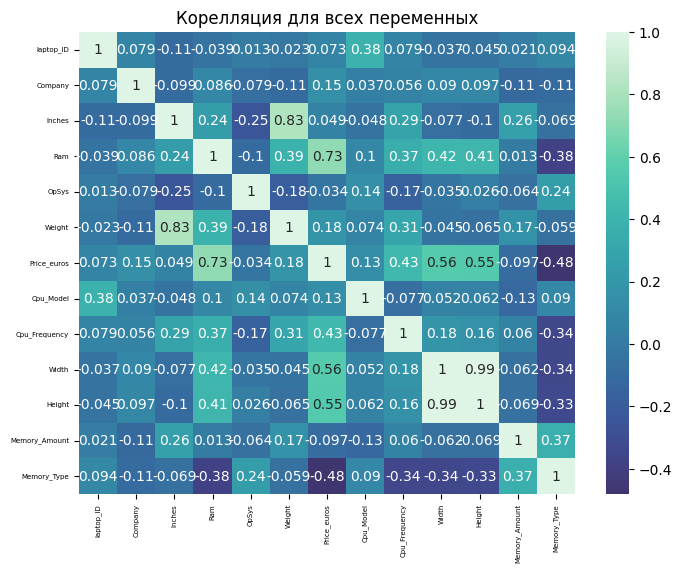

In [ ]:
df.corr(numeric_only = True)

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only = True), xticklabels = df.corr(numeric_only = True).columns, yticklabels = df.corr(numeric_only = True).columns, cmap = 'mako', center = 0, annot = True)

plt.title('Корелляция для всех переменных', fontsize = 12)
plt.xticks(fontsize = 5)
plt.yticks(fontsize = 5)
plt.show()

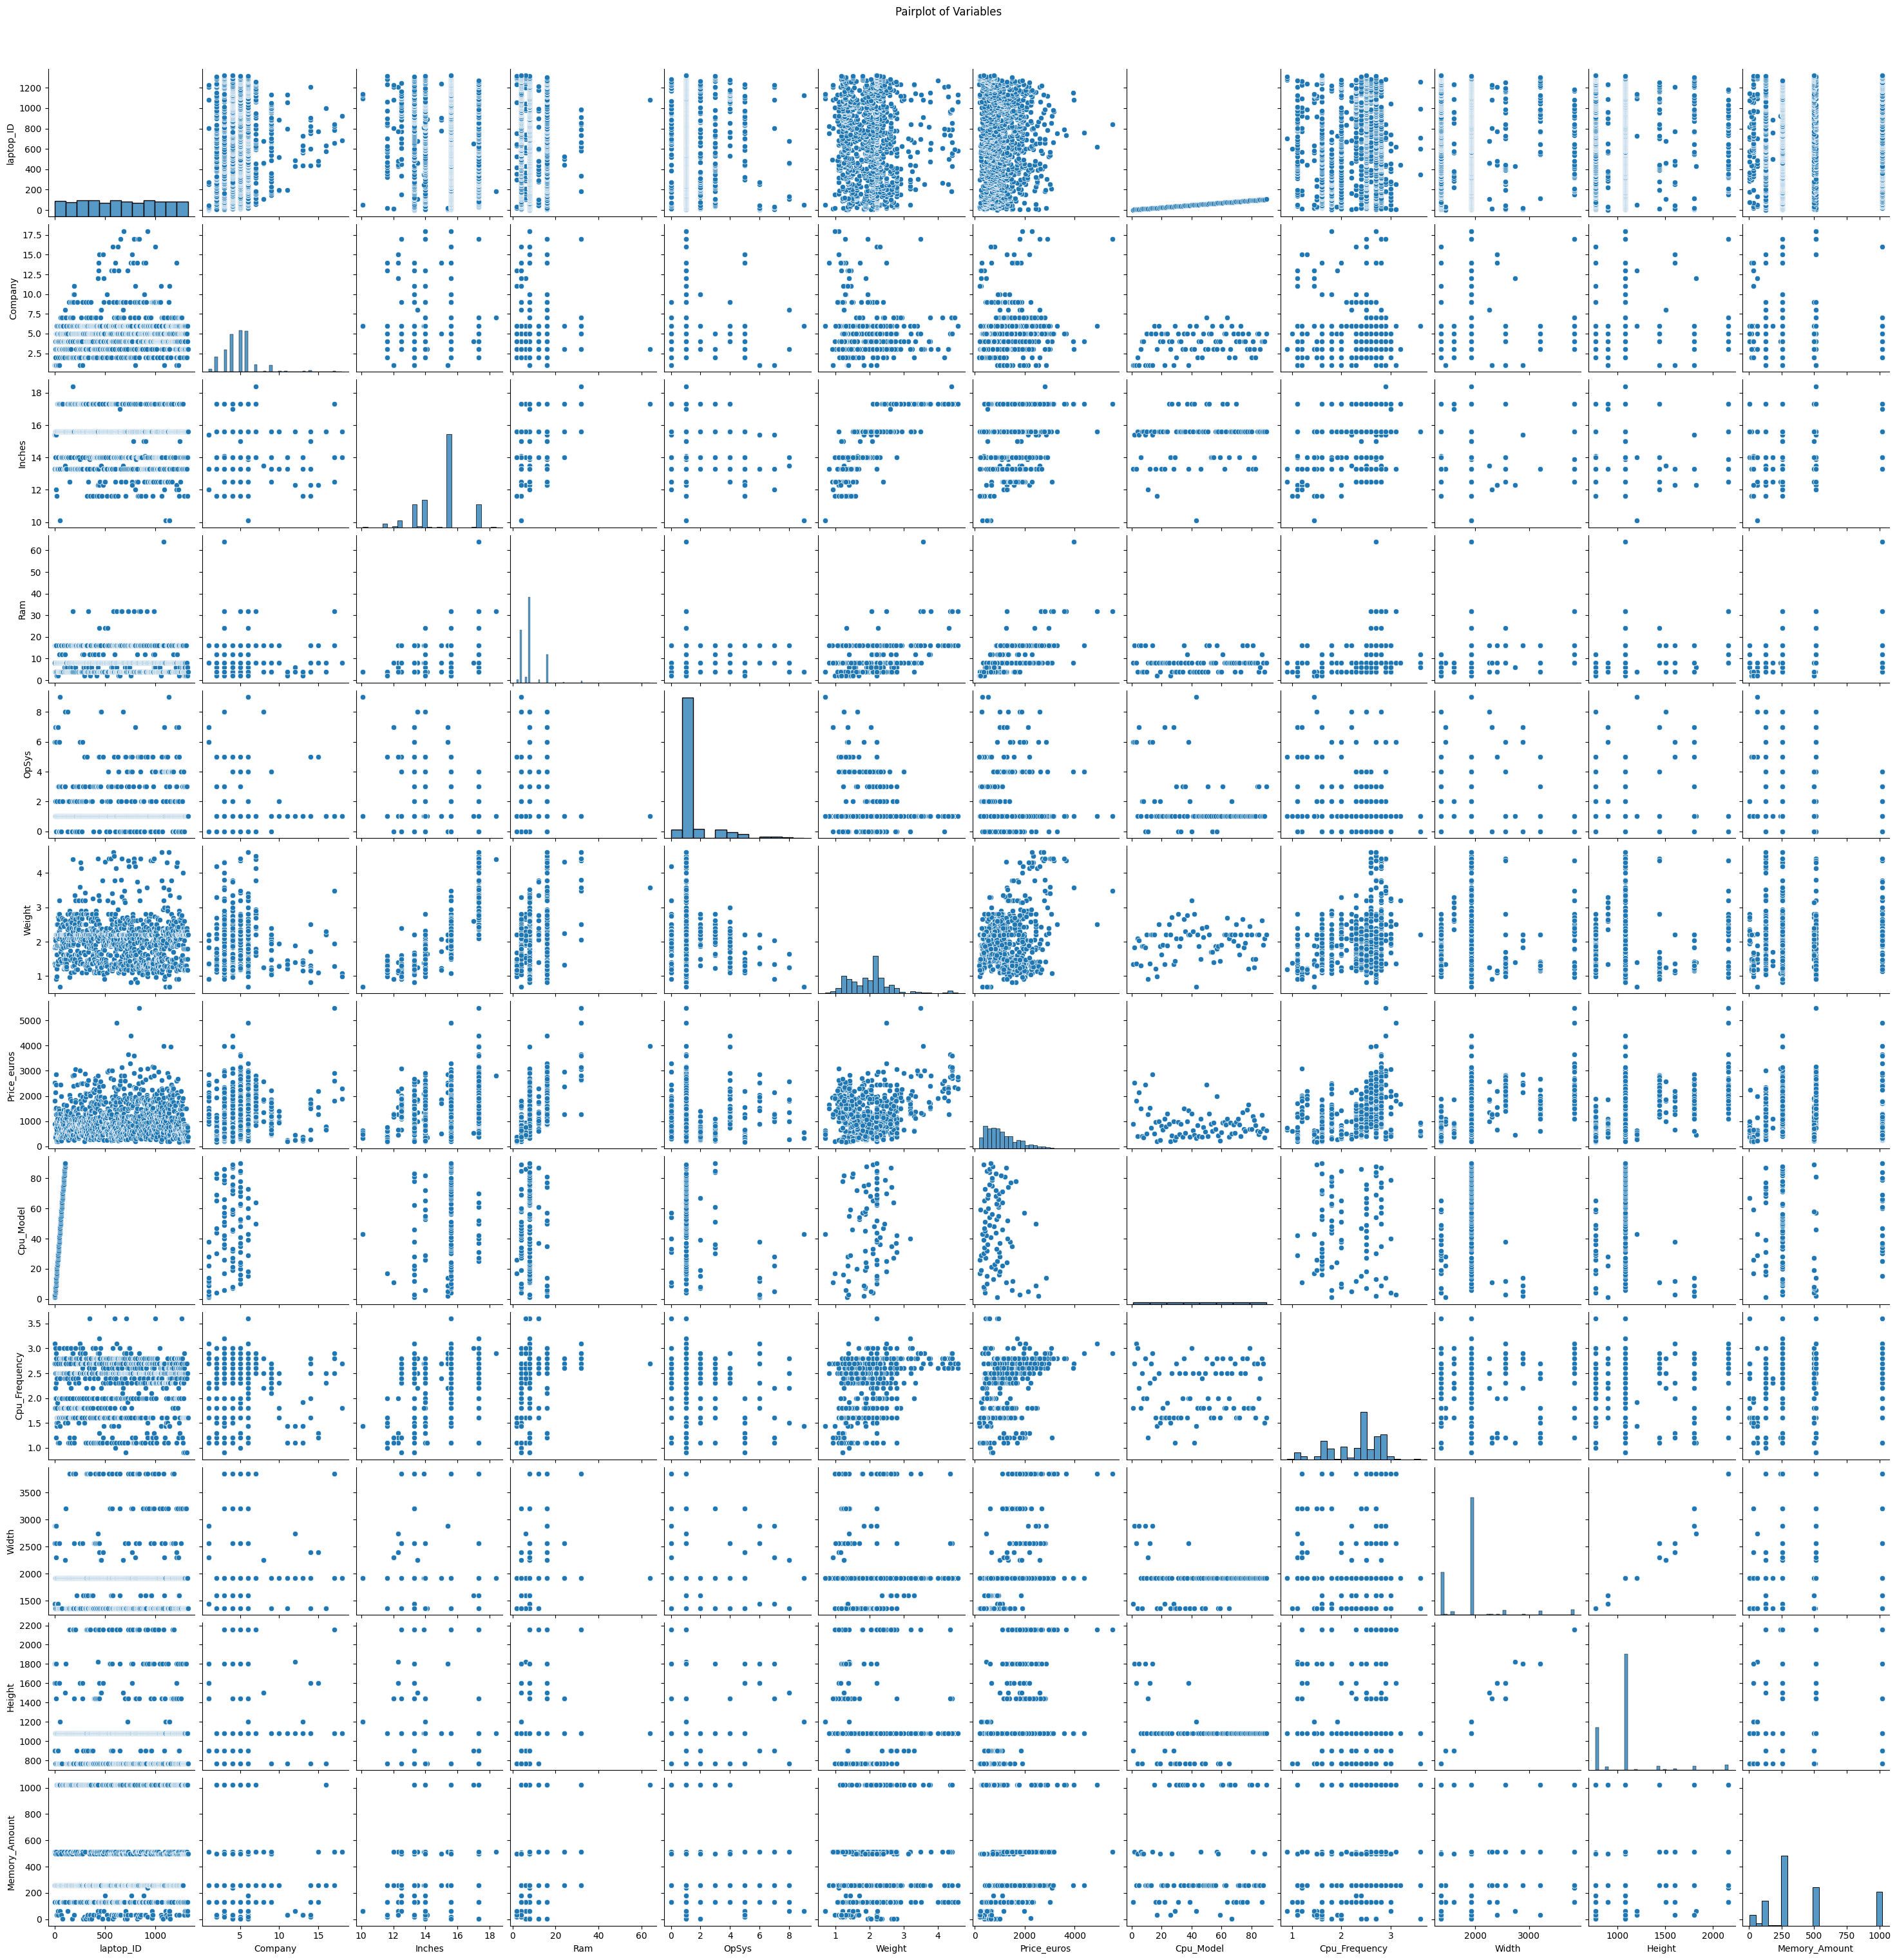

In [ ]:
sns.pairplot(df)
plt.suptitle('Pairplot of Variables', y=1.02, color = 'k')
plt.show()

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Model,Cpu_Frequency,Width,Height,Memory_Amount,Memory_Type
0,2,1,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,6.0,1.34,898.94,1,1.8,1440,900,128.0,3
1,4,1,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,6.0,1.83,2537.45,2,2.7,2880,1800,512.0,1
2,5,1,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,6.0,1.37,1803.60,1,3.1,2560,1600,256.0,1
3,6,2,Aspire 3,Notebook,15.6,4,AMD Radeon R5,1.0,2.10,400.00,3,3.0,1366,768,500.0,2
4,7,1,MacBook Pro,Ultrabook,15.4,16,Intel Iris Pro Graphics,7.0,2.04,2139.97,2,2.2,2880,1800,256.0,3


In [ ]:
df['Gpu'].unique()

array(['Intel HD Graphics 6000', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel HD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'Intel Iris Plus Graphics 640',
       'AMD Radeon Pro 560', 'Nvidia GeForce 940MX',
       'Intel UHD Graphics 620', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics 500',
       'Nvidia GeForce 930MX ', 'Nvidia GeForce GTX 1060',
       'Nvidia GeForce 150MX', 'Intel Iris Graphics 540',
       'AMD Radeon RX 580', 'Nvidia GeForce 920MX',
       'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeForce 920M', 'AM

In [ ]:
imp_w = imputer.transform(df[['Weight']])
imp = pd.DataFrame(imp_w, columns = ['Weight'])
df[['Weight']] = imp

df.isnull().sum()

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
Gpu,0
OpSys,0
Weight,0
Price_euros,0


In [ ]:
df = pd.get_dummies(df, columns=['TypeName'], drop_first=True)
boolean_columns = df.select_dtypes(include='bool').columns
for col in boolean_columns:
    df[col] = df[col].astype(int)

In [ ]:
df = df.select_dtypes(include=np.number)
df

,laptop_ID,Company,Inches,Ram,OpSys,Price_euros,Cpu_Model,Cpu_Frequency,Width,Height,Memory_Amount,Memory_Type,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,2,1,13.3,8,6.0,898.94,1,1.8,1440,900,128.0,3,0,0,0,1,0
1,4,1,15.4,16,6.0,2537.45,2,2.7,2880,1800,512.0,1,0,0,0,1,0
2,5,1,13.3,8,6.0,1803.60,1,3.1,2560,1600,256.0,1,0,0,0,1,0
3,6,2,15.6,4,1.0,400.00,3,3.0,1366,768,500.0,2,0,0,1,0,0
4,7,1,15.4,16,7.0,2139.97,2,2.2,2880,1800,256.0,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1315,3,15.6,4,1.0,720.32,33,2.5,1366,768,500.0,2,0,0,1,0,0
1104,1316,6,14.0,4,1.0,638.00,33,2.5,1920,1080,128.0,1,0,0,0,0,0
1105,1318,6,14.0,2,1.0,229.00,67,1.6,1366,768,64.0,3,0,0,1,0,0
1106,1319,4,15.6,6,1.0,764.00,33,2.5,1366,768,1024.0,2,0,0,1,0,0


In [ ]:
print(df.columns.tolist())

['laptop_ID', 'Company', 'Inches', 'Ram', 'OpSys', 'Price_euros', 'Cpu_Model', 'Cpu_Frequency', 'Width', 'Height', 'Memory_Amount', 'Memory_Type', 'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation']


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = df.drop(columns=['laptop_ID', 'Price_euros'])
y = df['Price_euros']


std = StandardScaler()
X_std = std.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)
X_std.describe()

,Company,Inches,Ram,OpSys,Cpu_Model,Cpu_Frequency,Width,Height,Memory_Amount,Memory_Type,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
count,1108.000000,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03,1.108000e+03
mean,0.000000,2.173953e-15,3.206420e-17,-2.885778e-17,-5.130272e-17,-7.310638e-16,2.244494e-17,-1.539082e-16,3.527062e-17,1.282568e-16,1.923852e-17,1.282568e-17,-1.346697e-16,3.206420e-18,3.847704e-17
std,1.000452,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00,1.000452e+00
min,-1.715242,-3.476051e+00,-1.253965e+00,-1.129511e+00,-1.026514e+00,-2.748596e+00,-1.079306e+00,-1.072986e+00,-1.301180e+00,-6.757899e-01,-4.257190e-01,-1.355815e-01,-1.141724e+00,-4.197866e-01,-1.519343e-01
25%,-0.428520,-7.279744e-01,-8.596987e-01,-3.277825e-01,-7.679484e-01,-5.825056e-01,-5.991404e-01,-6.027171e-01,-5.113363e-01,-6.757899e-01,-4.257190e-01,-1.355815e-01,-1.141724e+00,-4.197866e-01,-1.519343e-01
50%,0.000387,3.994415e-01,-7.116711e-02,-3.277825e-01,-4.576700e-01,4.020810e-01,5.749647e-02,3.855887e-02,-5.113363e-01,-6.757899e-01,-4.257190e-01,-1.355815e-01,8.758682e-01,-4.197866e-01,-1.519343e-01
75%,0.429294,3.994415e-01,-7.116711e-02,-3.277825e-01,3.180260e-01,7.959157e-01,5.749647e-02,3.855887e-02,2.847269e-01,8.939695e-01,-4.257190e-01,-1.355815e-01,8.758682e-01,-4.197866e-01,-1.519343e-01
max,5.576183,2.372419e+00,1.096828e+01,6.086045e+00,3.575949e+00,2.568172e+00,3.997318e+00,3.886215e+00,1.876853e+00,4.033488e+00,2.348967e+00,7.375636e+00,8.758682e-01,2.382163e+00,6.581793e+00


In [ ]:
mmsc = MinMaxScaler()
X_norm = mmsc.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns)
X_norm.describe()

,Inches,Ram,Weight,Cpu_Frequency,Width,Height,Memory_Amount,Company_Apple,Company_Asus,Company_Chuwi,...,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Memory_Type_HDD,Memory_Type_Hybrid,Memory_Type_SSD
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,...,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,0.594352,0.102597,0.343936,0.516968,0.212603,0.216363,0.409429,0.015343,0.121841,0.001805,...,0.003610,0.003610,0.153430,0.018051,0.565884,0.149819,0.022563,0.291516,0.007220,0.642599
std,0.171062,0.081855,0.165032,0.188169,0.197070,0.201736,0.314802,0.122968,0.327250,0.042467,...,0.060003,0.060003,0.360564,0.133194,0.495864,0.357056,0.148573,0.454666,0.084703,0.479451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.469880,0.032258,0.207161,0.407407,0.094584,0.094828,0.248532,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.662651,0.096774,0.360614,0.592593,0.223929,0.224138,0.248532,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.662651,0.096774,0.411765,0.666667,0.223929,0.224138,0.499022,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.13, random_state= 91)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train-test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (963, 15), (963,)
Train-test dataset size: (145, 15), (145,)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# ********

In [ ]:
from sklearn import metrics

print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", model.score(X_test, y_test))

MAE 217.4159597164215
MSE 81739.26190853573
R2 Score: 0.8359431742392097


In [ ]:
y_pred_train = model.predict(X_std)

In [ ]:
print("MAE", metrics.mean_absolute_error(y, y_pred_train))
print("MSE", metrics.mean_squared_error(y, y_pred_train))
print("R2 Score:", model.score(X_std, y))

MAE 259.7075919186789
MSE 124874.57668741004
R2 Score: 0.7360931820765226


In [ ]:
df2 = pd.read_csv('Price_euros_test.csv', encoding='latin1')

df2.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,86,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,1TB HDD,AMD Radeon R5,Windows 10,2.1kg
1,1249,Razer,Blade Pro,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,1TB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95kg
2,122,Asus,VivoBook S15,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.7kg
3,993,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.99kg
4,739,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,12GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.25kg


In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')

imp_scr = imputer.fit_transform(df2[['ScreenResolution']])
imp_w = imputer.fit_transform(df2[['Weight']])
mp_combined = np.column_stack((imp_scr, imp_w))
imp = pd.DataFrame(mp_combined, columns = ['ScreenResolution', 'Weight'])
df2[['ScreenResolution', 'Weight']] = imp


#очистка столбца ram
df2['Ram'] = df2['Ram'].astype(str)
df2['Ram'] = df2['Ram'].str.extract(r'(\d+)')
df2['Ram'] = df2['Ram'].astype(int)

df2['Weight'] = df2['Weight'].str.extract(r'(\d+\.\d+)')
df2['Weight'] = df2['Weight'].astype(float)

cpu_pattern = r'(.+?)\s+(\d+\.?\d*)\s*GHz'
extracted_cpu = df2['Cpu'].str.extract(cpu_pattern)
df2[['Cpu_Model', 'Cpu_Frequency']] = extracted_cpu
df2['Cpu_Frequency'] = df2['Cpu_Frequency'].astype(float)

screen_pattern = r'(?:(Full HD|IPS Panel|Touchscreen|4K Ultra HD|Retina Display|HD)?\s*(\d+)\s*x\s*(\d+))'
df2[['Screen_Type', 'Width', 'Height']] = df2['ScreenResolution'].str.extract(screen_pattern)
df2['Width'] = df2['Width'].astype(int)
df2['Height'] = df2['Height'].astype(int)


memory_pattern = r'(\d+\.?\d*\s*(GB|TB))\s*(HDD|SSD|Flash Storage|Hybrid)?'
df2[['Memory_Amount', 'Memory_Unit', 'Memory_Type']] = df2['Memory'].str.extract(memory_pattern)
df2['Memory_Amount'] = df2['Memory_Amount'].str.replace('GB', '', regex = False)
df2['Memory_Amount'] = df2['Memory_Amount'].str.replace('TB', '', regex = False)
df2['Memory_Amount'] = df2['Memory_Amount'].astype(float)


df2 = df2.drop('Cpu', axis = 1)
df2 = df2.drop('ScreenResolution', axis = 1)
df2['Memory_Amount'] = df2['Memory_Amount'].replace(1.0, 1024.0)
df2 = df2.drop('Memory_Unit', axis = 1)
df2 = df2.drop('Screen_Type', axis = 1)
df2 = df2.drop('Memory', axis = 1)

In [ ]:
df2['Cpu_Model'].unique().tolist()

['AMD A9-Series 9420',
 'Intel Core i7 7700HQ',
 'Intel Core i7 8550U',
 'Intel Core i5 7200U',
 'Intel Core i7 7820HQ',
 'Intel Celeron Quad Core N3450',
 'Intel Core i7 6700HQ',
 'Intel Celeron Dual Core N3350',
 'Intel Core i7 7500U',
 'Intel Core i5 7300HQ',
 'Intel Core i3 6006U',
 'Intel Core i5 8250U',
 'Intel Core i5 6200U',
 'Intel Core i3 6100U',
 'Intel Core i5 6300U',
 'Intel Core i7 6600U',
 'AMD A6-Series 9220',
 'Intel Core i7 7820HK',
 'Intel Pentium Quad Core N3710',
 'Intel Core i5',
 'Intel Celeron Dual Core N3060',
 'Intel Core i7 6820HQ',
 'Intel Celeron Dual Core N3050',
 'AMD A9-Series 9410',
 'Intel Pentium Quad Core N4200',
 'Intel Core i7 7600U',
 'Intel Core i3 7100U',
 'Intel Core i7 6500U',
 'AMD A10-Series 9600P',
 'Intel Core M m7-6Y75',
 'AMD A6-Series A6-9220',
 'Intel Core i7 6820HK',
 'Intel Atom x5-Z8300',
 'Intel Core i5 7300U',
 'AMD A10-Series A10-9620P',
 'Intel Core i7 8650U',
 'Intel Core i7 6560U',
 'Intel Core i3 7130U']

In [ ]:
df2['Memory_Type'] = df2['Memory_Type'].replace({'SSD': 1, 'HDD': 2, 'Flash Storage': 3, 'Hybrid' : 4})

df2['Cpu_Model'] = df2['Cpu_Model'].replace({'AMD A9-Series 9420':3,
 'Intel Core i7 7700HQ':19,
 'Intel Core i7 8550U':4,
 'Intel Core i5 7200U':5,
 'Intel Core i7 7820HQ':38,
 'Intel Celeron Quad Core N3450':0,
 'Intel Core i7 6700HQ':54,
 'Intel Celeron Dual Core N3350':15,
 'Intel Core i7 7500U':8,
 'Intel Core i5 7300HQ':12,
 'Intel Core i3 6006U':6,
 'Intel Core i5 8250U':10,
 'Intel Core i5 6200U':27,
 'Intel Core i3 6100U':55,
 'Intel Core i5 6300U':64,
 'Intel Core i7 6600U':36,
 'AMD A6-Series 9220':0,
 'Intel Core i7 7820HK':35,
 'Intel Pentium Quad Core N3710':42,
 'Intel Core i5':0,
 'Intel Celeron Dual Core N3060':23,
 'Intel Core i7 6820HQ':47,
 'Intel Celeron Dual Core N3050':67,
 'AMD A9-Series 9410':90,
 'Intel Pentium Quad Core N4200':21,
 'Intel Core i7 7600U':39,
 'Intel Core i3 7100U':9,
 'Intel Core i7 6500U':33,
 'AMD A10-Series 9600P':66,
 'Intel Core M m7-6Y75':81,
 'AMD A6-Series A6-9220':86,
 'Intel Core i7 6820HK':60,
 'Intel Atom x5-Z8300':0,
 'Intel Core i5 7300U':44,
 'AMD A10-Series A10-9620P':58,
 'Intel Core i7 8650U':14,
 'Intel Core i7 6560U':0,
 'Intel Core i3 7130U':18})

df2['Company'] = df2['Company'].replace({'Huawei': 0, 'Apple': 1,
 'Acer': 2,
 'Asus': 3,
 'HP': 4,
 'Dell': 5,
 'Lenovo': 6,
 'MSI': 7,
 'Microsoft': 8,
 'Toshiba': 9,
 'Xiaomi': 10,
 'Vero': 11,
 'Chuwi': 12,
 'Mediacom': 13,
 'Samsung' : 14,
 'Google': 15,
 'Fujitsu': 16,
 'Razer': 17,
 'LG': 18})

df2['OpSys'] = df2['OpSys'].replace({'Windows 10': 1, 'No OS': 2, 'Linux': 3, 'Windows 7' : 4, 'Chrome OS': 5,
                                   'macOS': 6, 'Mac OS X': 7, 'Windows 10 S': 8, 'Android': 9})


imp_w = imputer.transform(df2[['Weight']])
imp = pd.DataFrame(imp_w, columns = ['Weight'])
df2[['Weight']] = imp

df2 = pd.get_dummies(df2, columns=['TypeName'], drop_first=True)
boolean_columns = df2.select_dtypes(include='bool').columns
for col in boolean_columns:
    df2[col] = df2[col].astype(int)

<ipython-input-128-35fe8b6b8920>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Memory_Type'] = df2['Memory_Type'].replace({'SSD': 1, 'HDD': 2, 'Flash Storage': 3, 'Hybrid' : 4})
<ipython-input-128-35fe8b6b8920>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Cpu_Model'] = df2['Cpu_Model'].replace({'AMD A9-Series 9420':3,
<ipython-input-128-35fe8b6b8920>:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_

In [ ]:
df2.isnull().sum()

,0
laptop_ID,0
Company,0
Product,0
Inches,0
Ram,0
Gpu,0
OpSys,12
Weight,0
Cpu_Model,0
Cpu_Frequency,0


In [ ]:
df2 = df2.fillna(0)

df2.isnull().sum()

,0
laptop_ID,0
Company,0
Product,0
Inches,0
Ram,0
Gpu,0
OpSys,0
Weight,0
Cpu_Model,0
Cpu_Frequency,0


In [ ]:
df2.head()

,laptop_ID,Company,Product,Inches,Ram,Gpu,OpSys,Weight,Cpu_Model,Cpu_Frequency,Width,Height,Memory_Amount,Memory_Type,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,86,2,Aspire 3,15.6,4,AMD Radeon R5,1.0,2.1,3,3.0,1366,768,1024.0,2,0,0,1,0,0
1,1249,17,Blade Pro,14.0,16,Nvidia GeForce GTX 1060,1.0,1.95,19,2.8,1920,1080,1024.0,1,1,0,0,0,0
2,122,3,VivoBook S15,15.6,8,Nvidia GeForce 940MX,1.0,1.7,4,1.8,1920,1080,256.0,1,0,0,1,0,0
3,993,3,Rog GL753VE-DS74,17.3,16,Nvidia GeForce GTX 1050 Ti,1.0,2.99,19,2.8,1920,1080,256.0,1,1,0,0,0,0
4,739,5,Inspiron 3567,15.6,12,Intel HD Graphics 620,1.0,2.25,5,2.5,1366,768,1024.0,2,0,0,1,0,0


In [ ]:
df2 = df2.select_dtypes(include=np.number)

In [ ]:
X_test2 = df2.drop(columns=['laptop_ID'])

std = StandardScaler()
X_t = std.fit_transform(X_test2)
X_t = pd.DataFrame(X_t, columns=X_test2.columns)
X_t.describe()

,Company,Inches,Ram,OpSys,Cpu_Model,Cpu_Frequency,Width,Height,Memory_Amount,Memory_Type,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
count,1.950000e+02,1.950000e+02,195.000000,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,9.451129e-17,5.192428e-16,0.000000,-2.732857e-17,-4.554761e-17,-1.503071e-16,-1.821904e-16,9.109522e-17,6.376666e-17,1.548619e-16,-6.376666e-17,4.554761e-18,1.252559e-16,-3.643809e-17,-1.821904e-17
std,1.002574e+00,1.002574e+00,1.002574,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00
min,-1.976377e+00,-2.485216e+00,-1.265714,-1.076216e+00,-1.041040e+00,-2.450043e+00,-1.056886e+00,-1.058035e+00,-1.314255e+00,-6.292369e-01,-4.677072e-01,-1.622214e-01,-1.025978e+00,-4.264014e-01,-1.447149e-01
25%,-4.129144e-01,-6.350093e-01,-0.876417,-2.812838e-01,-7.748416e-01,-6.360768e-01,4.207441e-02,2.244791e-02,-5.441363e-01,-6.292369e-01,-4.677072e-01,-1.622214e-01,-1.025978e+00,-4.264014e-01,-1.447149e-01
50%,-2.204883e-02,4.614097e-01,-0.097823,-2.812838e-01,-4.021641e-01,3.716822e-01,4.207441e-02,2.244791e-02,-5.441363e-01,-6.292369e-01,-4.677072e-01,-1.622214e-01,9.746794e-01,-4.264014e-01,-1.447149e-01
75%,3.688167e-01,4.614097e-01,-0.097823,-2.812838e-01,3.964306e-01,7.747858e-01,4.207441e-02,2.244791e-02,2.320462e-01,9.438554e-01,-4.677072e-01,-1.622214e-01,9.746794e-01,-4.264014e-01,-1.447149e-01
max,5.059203e+00,1.626355e+00,4.573738,5.283243e+00,3.750528e+00,1.379441e+00,3.850744e+00,3.762582e+00,1.784411e+00,4.090040e+00,2.138090e+00,6.164414e+00,9.746794e-01,2.345208e+00,6.910137e+00


In [ ]:
y_pred_test = model.predict(X_t)

y_pred_test

array([ 528.65510533, 1948.78344406,  843.99242863, 1713.61582879,
        989.85078631, 1164.93341008, 1319.67723984,  602.96944547,
        997.52581325,  661.26244658, 1276.18875475,  943.97260867,
       1198.54647606,  654.90925844, 1228.54677574, 2230.91311208,
       1003.36163223,   40.18459211, 1108.61911368,  525.50419695,
        954.5435654 , 1223.45094318,  385.11367102, 1262.68670676,
       1780.82178448, 1657.67690332,  779.45315489,  767.99866023,
        384.30454643, 2784.69632463,  624.74054627, 1745.5527512 ,
        520.08506335, 1794.34805314,  863.24766019, 1133.34610873,
       1095.75832708,   39.61959812, 2667.39061367,  546.29917655,
       1741.97937291,  284.07622633,  165.25367008, 1294.62362917,
       1107.55884824, 1134.78415574, 1559.54846479, 1826.11099234,
       1102.89399327, 1414.14122239, 1254.51952661,  871.68073225,
       1737.19057612, 2165.2965093 ,  665.8891412 ,  871.68073225,
       1804.06554966, 1180.47865134,  611.56730496,  988.28700

In [ ]:
y_pred_test.shape

(195,)

In [ ]:
Price_euros = y_pred_test

result_dataframe = pd.DataFrame(Price_euros)
result_dataframe = pd.DataFrame(Price_euros, columns=['Price_euros'])
result_dataframe['Price_euros'] = result_dataframe['Price_euros'].round(2)

result_dataframe['index'] = result_dataframe.index


result_dataframe = result_dataframe[['index', 'Price_euros']]

result_dataframe.to_csv('prices.csv', index=False)

In [ ]:
result_dataframe.head()

,index,Price_euros
0,0,528.66
1,1,1948.78
2,2,843.99
3,3,1713.62
4,4,989.85
